In [1]:
""" some basic packages and settings to show images inline """
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from toy_model import *
np.random.seed(seed=1)
G = G2Model()

# Task 1
Use the training set size of 40 points and hidden size  D = 10. Find the optimal setting of parameters w,b by linear regression. Plot the classifier decision boundary.

Test error with D = 10: 5.692%


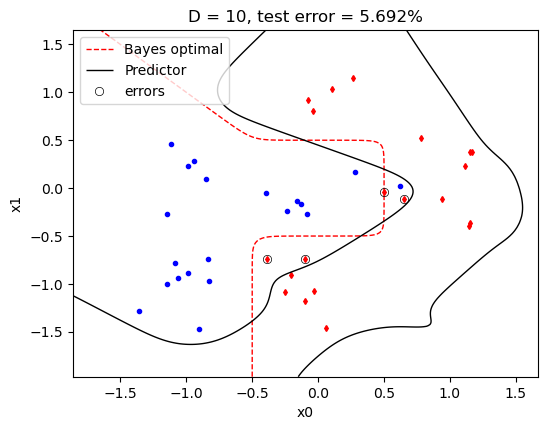

In [4]:
# Parameters
D = 10
N = 40

# Generate train/test data
train_data = G.generate_sample(N)
test_data = G.generate_sample(50000)

# Network creation and training
net = MyNet(2, D)
net.train(train_data)

# Error info
err = G.test_error(net, test_data)
print(f'Test error with D = {D}: {err*100}%')

# Plotting
G.plot_boundary(train_data, net)
plt.title(f"D = {D}, test error = {err*100}%")
plt.show()

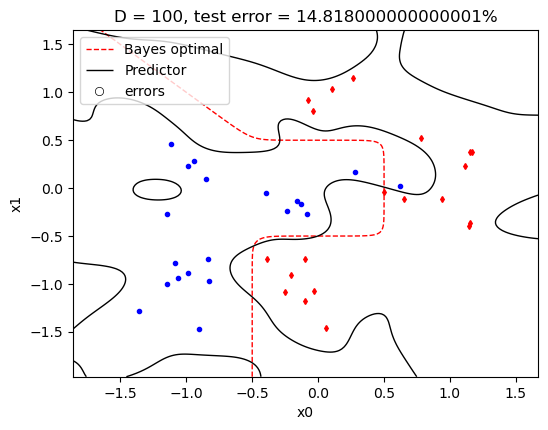

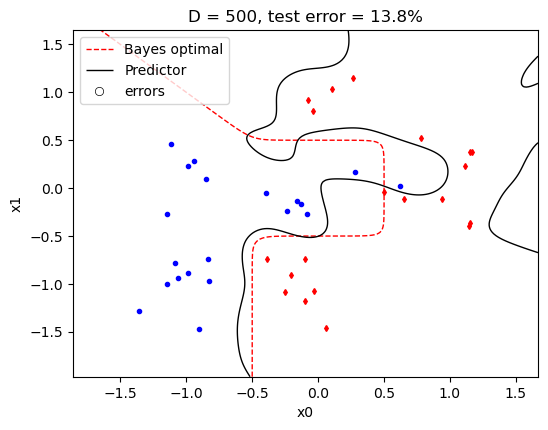

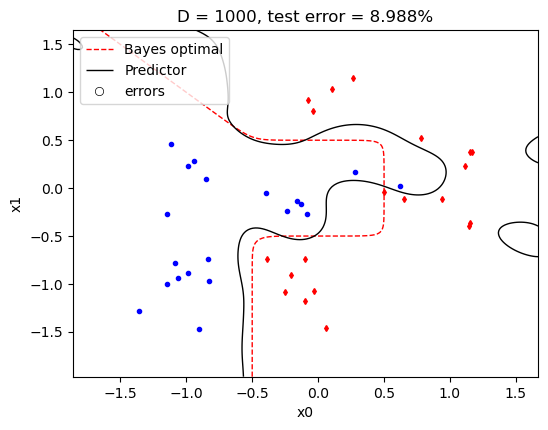

Test error with D = 100: 14.818000000000001%
Test error with D = 500: 13.8%
Test error with D = 1000: 8.988%


In [5]:
D_list = [100, 500, 1000] # hidden dimension
err_list = np.zeros(len(D_list))

plt.show()
for i in range(len(D_list)):
    D = D_list[i]
    
    # Network creation and training
    net = MyNet(2, D)
    net.train(train_data)

    # Error info
    err = G.test_error(net, test_data)
    err_list[i] = err

    # Plotting
    G.plot_boundary(train_data, net)
    plt.title(f"D = {D}, test error = {err*100}%")
    plt.show()

for i in range(len(D_list)):
    print(f'Test error with D = {D_list[i]}: {err_list[i]*100}%')

The next task is to reproduce the following experiment. We fix the hidden dimension size D = 40 and vary the training data size as N = 2, 4, … 100. The observed test error (measured on independently drawn large enough test set) behaves as this:

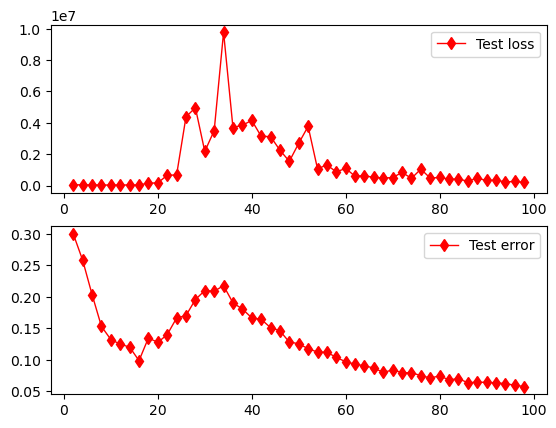

In [ ]:
D = 40
net = MyNet(2, D)
test_data = G.generate_sample(50000)

N_list = np.arange(2,100,2)
err = np.zeros(N_list.shape)
loss = np.zeros(N_list.shape)

attempts = 100
for t in range(attempts):
    for i in range(len(N_list)):
        N = N_list[i]

        # Generate new training data
        train_data = G.generate_sample(N)

        # MyNet training
        net.train(train_data)
        
        # Calculating error
        err[i] += G.test_error(net, test_data) / attempts

        # Calculating loss
        loss[i] += net.get_loss(test_data) / attempts

# Plot results
fig, axs = plt.subplots(2)
axs[0].plot(N_list, loss, 'd-', color='red', label='Test loss')
axs[0].legend()
axs[1].plot(N_list, err, 'd-', color='red', label="Test error")
axs[1].legend()

There is a pathological behaviour from 10 to 40 samples: the amount of training data increases, but it leads to worse results. Only after the threshold of 40 more data starts to help.

# Task 2
In the next experiment to reproduce, we fix the training data size N = 40 and vary the hidden dimension D = 1, 10, 20, … 200. The observed dependence is as follows:

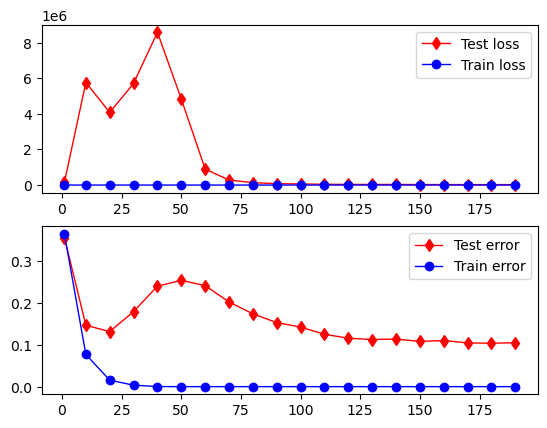

In [ ]:
N = 40
D_list = np.arange(0, 200, 10)
D_list[0] = 1 # Change 1st element (zero) to 1

# Generate new test/train data
train_data = G.generate_sample(N)
test_data = G.generate_sample(50000)

# init err/loss values
err_test = np.zeros(D_list.shape)
err_train = np.zeros(D_list.shape)
loss_test = np.zeros(D_list.shape)
loss_train = np.zeros(D_list.shape)

attempts = 100
for t in range(attempts):
    for i in range(len(D_list)):
        D = D_list[i]

        # Create new MyNet and train
        net = MyNet(2, D)
        net.train(train_data)
        
        # Calculating test/train error
        err_test[i] += G.test_error(net, test_data) / attempts
        err_train[i] += G.test_error(net, train_data) / attempts

        # Calculating loss
        loss_test[i] += net.get_loss(test_data) / attempts
        loss_train[i] += net.get_loss(train_data) / attempts

# Plot results
fig, axs = plt.subplots(2)
axs[0].plot(D_list, loss_test, 'd-', color='red', label='Test loss')
axs[0].plot(D_list, loss_train, 'o-', color='blue', label='Train loss')
axs[0].legend()
axs[1].plot(D_list, err_test, 'd-', color='red', label="Test error")
axs[1].plot(D_list, err_train, 'o-', color='blue', label="Train error")
axs[1].legend()

Again, with hidden dimensions below 40, we observe rather a classical picture of generalization: if the model capacity is too high we start to overfit and performance worthens. However, after the threshold at around 50, the test error starts decreasing again and eventually achieves even a lower value in the highly-overparameterized mode.